# 2. Deep Learning

Las deep network, o lo que hoy en día se conoce como deep learning, hace referencia a modelos de redes neuronales estructurados con muchas capas, es decir, el cómputo de la función final es la composición una gran cantidad de funciones ( $f^{(n)} = f^{(n-1)} \circ f^{(n-2)} \circ \cdots \circ f^{(2)} \circ f^{(1)} $ con $n \gg 0$ ).

Este tipo de redes neuronales tienen una gran cantidad de parámetros, creciendo exponencialmente por capa con las redes feed forward, siendo bastante dificiles de entrenar comparadas con una red poco profunda, esto es debido a que requieren una gran cantidad de datos para ajustar correctamente todos esos parámetros. Pero entonces ¿Cuál es el beneficio que tienen este tipo de redes? ¿Qué ganancias trae el añadir capas a una arquitectura de una red neuronal?

En esta sección se estudiará la complejidad de entrenar redes neuronales profundas, mediante la visualización de los gradientes de los pesos en cada capa, el cómo varía mientras se hace el backpropagation hacia las primeras capas de la red.

a) Se trabajará con las etiquetas escaladas uniformemente, es decir, $\mu=0$ y $\sigma=1$, ajuste sobre el conjunto de entrenamiento y transforme éstas además de las de pruebas.

In [ ]:
# scaler = StandardScaler().fit(df_train)
# X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
# y_train_scaled = X_train_scaled.pop('MEDV').values.reshape(-1,1)

In [2]:
import pandas as pd
from sklearn.cross_validation import train_test_split

url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical

df_train,df_test = train_test_split(df,test_size=0.25, random_state=0)

In [3]:
# Normalización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train), columns=df_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_train.columns)

y_train = X_train_scaled.pop('MEDV').values.reshape([-1,1])
y_test = X_test_scaled.pop('MEDV').values.reshape([-1,1])

i_dim = X_train_scaled.shape[1]
X_train_scaled.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_0,CHAS_1
count,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02
mean,4.218262e-17,2.343479e-17,8.436523e-17,7.194480e-16,-7.733480e-16,1.921653e-16,-2.085696e-16,1.335783e-16,1.476392e-16,-5.893849e-16,-2.999653e-16,2.460653e-16,1.839631e-16,5.975871e-17
std,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00
min,-4.130329e-01,-4.985312e-01,-1.514998e+00,-1.475198e+00,-3.973687e+00,-2.336467e+00,-1.246426e+00,-9.707975e-01,-1.263794e+00,-2.658465e+00,-4.025619e+00,-1.503671e+00,-3.762978e+00,-2.657470e-01
25%,-4.046811e-01,-4.985312e-01,-8.618530e-01,-9.235945e-01,-5.894549e-01,-8.334908e-01,-8.037506e-01,-6.245626e-01,-7.436108e-01,-4.879389e-01,1.944575e-01,-8.127456e-01,2.657470e-01,-2.657470e-01
50%,-3.818337e-01,-4.985312e-01,-3.598727e-01,-1.565211e-01,-1.208466e-01,3.323363e-01,-2.706425e-01,-5.091510e-01,-4.338385e-01,3.802716e-01,3.719387e-01,-1.843784e-01,2.657470e-01,-2.657470e-01
75%,-1.827370e-03,3.430872e-01,1.000608e+00,6.450276e-01,5.246631e-01,8.895201e-01,6.379857e-01,1.683670e+00,1.535846e+00,8.143769e-01,4.171933e-01,6.233235e-01,2.657470e-01,-2.657470e-01
max,1.037470e+01,3.709561e+00,2.375350e+00,2.713540e+00,3.563035e+00,1.109554e+00,3.988486e+00,1.683670e+00,1.798860e+00,1.682587e+00,4.277489e-01,3.396758e+00,2.657470e-01,3.762978e+00


b) Para el mismo problema definido anteriormente (sección 1) se entrenará diferentes redes. En esta primera instancia se trabajará con la misma red de la pregunta b), inicializada con pesos uniforme. Visualice el gradiente de la función de pérdida (loss) para el conjunto de entrenamiento respecto a los pesos en las distintas capas, para esto se le pedirá el cálculo del gradiente para una capa mediante la función de gradients (link) en el backend de Keras. Deberá generar un histograma para todos los pesos de cada capa antes y despues del entrenamiento con 300 epochs. Comente.

In [16]:
import tensorflow as tf
import keras
from keras import backend as K
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

In [6]:
model = Sequential()
model.add(Dense(200, input_dim=i_dim, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

###calculate gradients
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

In [7]:
len(evaluated_gradients)

4

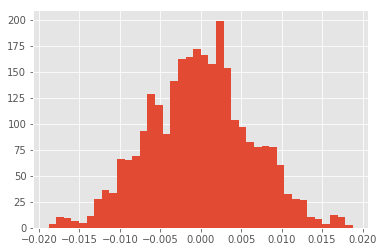

In [17]:
a = [1,1,2,3,4,5,6,7,8,9,10]
plt.hist(evaluated_gradients[0].flatten(),40)
#plt.xla
plt.show()

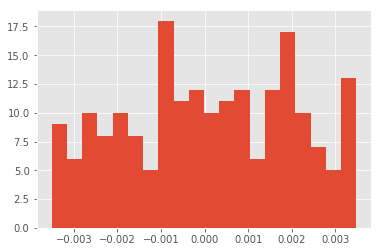

In [18]:
plt.hist(evaluated_gradients[1],20)
plt.show()

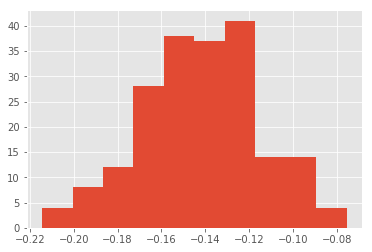

In [19]:
plt.hist(evaluated_gradients[2])
plt.show()

Fiteo

In [11]:
model.fit(X_train_scaled, y_train, epochs=300, verbose=0, validation_data=(X_test_scaled, y_test))
###calculate gradients
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_out = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients_out = [gradient/len(y_train) for gradient in evaluated_gradients]

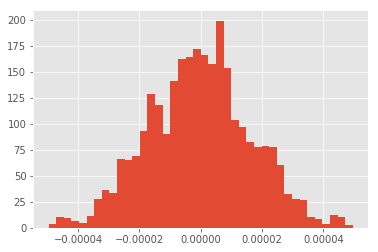

In [20]:
plt.hist(evaluated_gradients_out[0].flatten(),40)
#plt.xla
plt.show()

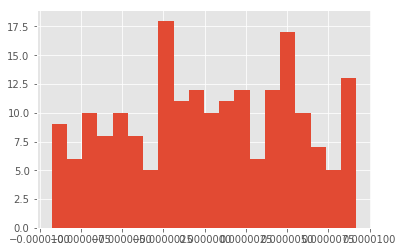

In [21]:
plt.hist(evaluated_gradients_out[1],20)
plt.show()

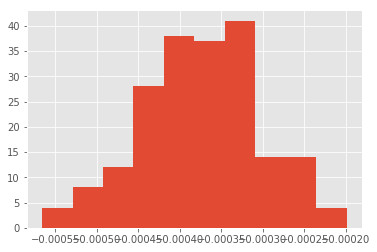

In [22]:
plt.hist(evaluated_gradients_out[2])
plt.show()

c) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento pero ahora entrenando una red mucho mas profunda de 6 capas, 5 capas escondidas y 1 de salida. Utilice el inicializador de pesos uniform el cual inicializa mediante una distribución uniforme entre $-1/\sqrt{N}$ y $1/\sqrt{N}$ para cada capa, con $N$ el número de neuronas de la capa anterior. Por simplicidad visual visualice las 3-4 primeras capas de la red. Comente si observa el efecto del gradiente desvaneciente antes y/o después de entrenar.

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

d) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento, pero ahora entrenando la red profunda con el inicializador de Glorot [1], es decir, una distribución uniforme entre -$\sqrt{6/(N_{in}+N_{out})}$ y $\sqrt{6/(N_{in}+N_{out})}$ . Por simplicidad visualice las 3-4 primeras capas de la red. Comente si el efecto del gradiente desvaneciente se amortigua antes y/o después de entrenar.

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

e) Vuelva a repetir la experimentación ahora cambiando la función de activación por ReLU, es decir, deberá visualizar los gradientes de los pesos de cada capa antes y después del entrenamiento, con inicialización uniform y comparar con la inicialización de He [2], es decir, una distribución uniforme entre -$\sqrt{6/N_{in}}$ y $\sqrt{6/N_{in}} $. Comente si ocurre el mismo fenómeno anterior (para función sigmoidal) sobre el efecto del gradiente desvaneciente para la función ReLU. Explique la importancia de la inicialización de los pesos dependiendo de la arquitectura.

In [ ]:
#uniform
...
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
...
#he initializer
...
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
...

e) ¿Qué es lo que sucede con la red más profunda? ¿El modelo logra convergencia en su entrenamiento? Modifique aspectos estructurales (funciones de activación, inicializadores, regularización, momentum, variación de tasa de aprendizaje, entre otros) de la red profunda de 6 capas definida anteriormente (no modifique la profundidad ni el número de neuronas) para lograr un error cuadrático medio (mse) similar o menor al de una red no profunda, como la definida en b) en esta sección, sobre el conjunto de pruebas.

f) Pruebe con utilizar una red shallow (poco profunda), es decir, sitúe todas las neuronas en una única capa ¿Qué sucede con la convergencia del algoritmo? ¿Por qué sucede este fenómeno?

In [ ]:
model = Sequential()
model.add(Dense(1000, input_dim=X_train_scaled.shape[1], kernel_initializer='choose',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='choose',activation='linear'))
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), epochs=300,
    verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))